<a href="https://colab.research.google.com/github/deep-dive-coding-data-science/Prework/blob/master/SSS_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt 
import openpyxl

In [0]:
xl = pd.ExcelFile('/content/drive/My Drive/SSS/Sleep Shepherd Study Data.xlsx')


In [0]:
sheetNames = (xl.sheet_names)
sheetNames

['people who meet requirements',
 'Support Data',
 'Variable Definitions',
 'updated psqi histogram',
 'updated buckets',
 'bucket histograms',
 '2412 - user_2412',
 '2417 - user_2417',
 '2762 - user_2762',
 '2830 - user_2830',
 '2831 - user_2831',
 '2832 - user_2832',
 '2833 - user_2833',
 '2834 - user_2834',
 '2835 - user_2835',
 '2836 - user_2836',
 '2838 - user_2838',
 '2839 - user_2839',
 '2842 - user_2842',
 '2844 - user_2844',
 'user_2845.csv',
 'user_2846.csv',
 'user_2847.csv',
 'user_2848.csv',
 'user_2850.csv',
 'user_2852.csv',
 'user_2853.csv',
 'user_2855.csv',
 'user_2856.csv',
 'user_2857.csv',
 'user_2859.csv',
 'user_2860.csv',
 'user_2862.csv',
 'user_2863.csv',
 'user_2864.csv',
 'user_2866.csv',
 'user_2867.csv',
 'user_2868.csv',
 'user_2869.csv',
 'user_2870.csv',
 'user_2871.csv',
 'user_2872.csv',
 'user_2873.csv',
 'user_2874.csv',
 'user_2878.csv',
 'user_2879.csv',
 'user_2880.csv',
 'user_2881.csv',
 'user_2886.csv',
 'user_2887.csv',
 'user_2888.csv',
 'us

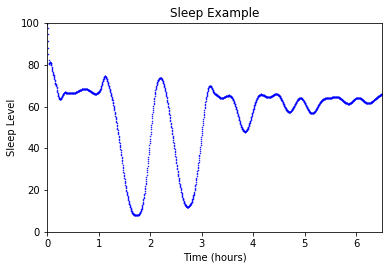

In [0]:
df = xl.parse(sheet_name=sheetNames[10], skiprows=[0])
uniIdx = df.proSleepID.unique()
uniDF  = df.loc[df['proSleepID'] == uniIdx[1]]

name = 'SleepExample'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sleep Example')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Sleep Level')
ax.axis([0, 6.5, 0, 100])
plt.plot(uniDF['proTime']/3600,uniDF['proSleepLvl'], 'b.', markersize=1)

#uniDF.head(4)
fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

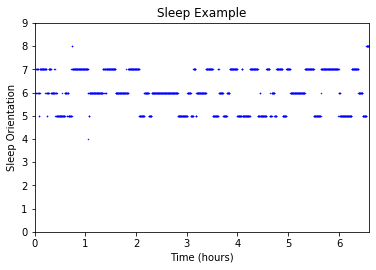

In [0]:
name = 'OrientationExample'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sleep Example')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Sleep Orientation')
ax.axis([0, 6.6, 0, 9])
plt.plot(uniDF['proTime']/3600,uniDF['proOrientation'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

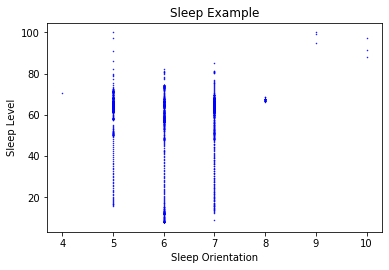

In [0]:
name = 'OrientationVsLevel'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sleep Example')
ax.set_xlabel('Sleep Orientation')
ax.set_ylabel('Sleep Level')
#ax.axis([0, 6.6, 0, 9])
plt.plot(uniDF['proOrientation'],uniDF['proSleepLvl'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

In [0]:
df = xl.parse(sheet_name=sheetNames[1])
uniIdx = df.Id.unique()

df['Total Sleep']=df.iloc[:,[3]].sum(axis=1)

df.head(5)

In [0]:
currIdx = np.where(uniIdx==2448)
lenData = len(df.Id)

lineIdx = []
for i in range(1,lenData):
  currIdx = np.where(uniIdx==df.Id[i-1])
  normIdx = currIdx[0][0]+1
  lineIdx.append(normIdx)

df2 = pd.DataFrame(lineIdx, columns=['Patient Index'])
df2['Total Sleep']=df.iloc[:,[3,4,5,7]].sum(axis=1)
df2['Total Awake']=df.iloc[:,[2]].sum(axis=1)
df2['Restless Fraction'] = df['Pro Sleep Lvl Restless']/df2['Total Sleep']
df2['Light Fraction'] = df['Pro Sleep Lvl Light']/df2['Total Sleep']
df2['Deep Fraction'] = df['Pro Sleep Lvl Deep']/df2['Total Sleep']
df2['REM Fraction'] = df['Pro Sleep Lvl Rem']/df2['Total Sleep']
df2['No EEG Fraction'] = df['Pro Sleep Lvl No EEG']/df2['Total Sleep']
df2.head(5)

,Patient Index,Total Sleep,Total Awake,Restless Fraction,Light Fraction,Deep Fraction,REM Fraction,No EEG Fraction
0,1,21180,4530,0.339235,0.449717,0.211048,0.018414,0.000000
1,1,11715,4830,0.334187,0.274008,0.391805,0.030730,0.000000
2,1,27930,2280,0.259936,0.234694,0.505371,0.028464,0.000000
3,1,22800,1260,0.211184,0.402632,0.386184,0.026974,0.000000
4,1,20820,4710,0.291787,0.148415,0.277378,0.020173,0.282421


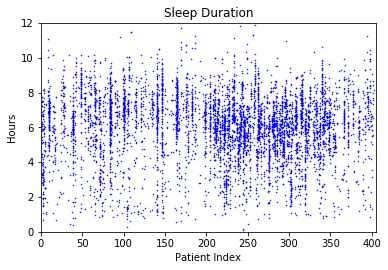

In [0]:
zeroIdx = np.where(df2['Total Sleep']==0)
df2.drop(zeroIdx[0],inplace=True)
#zeroIdx = np.where(df3['Total Sleep']==0)
df2.reset_index(drop=True, inplace=True)
smallIdx = np.where(df2['Total Sleep']<3600)

name = 'SleepDuration'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sleep Duration')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Hours')
ax.axis([0, 405, 0, 12])

plt.plot(df2['Patient Index'],df2['Total Sleep']/3600, 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

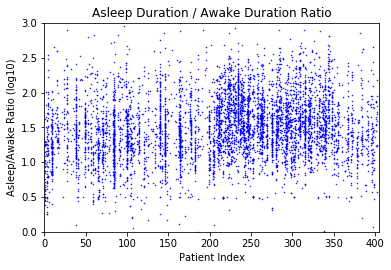

In [0]:
import math

name = 'AwakeAsleepRatio'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Asleep Duration / Awake Duration Ratio')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Asleep/Awake Ratio (log10)')
ax.axis([0, 405, 0, 3])

plt.plot(df2['Patient Index'],np.log10(df2['Total Sleep']/df2['Total Awake']), 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

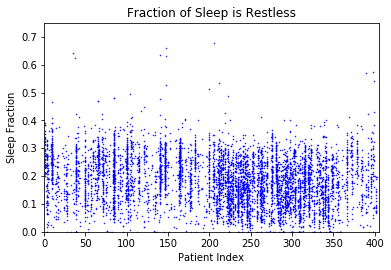

In [0]:
name = 'RestlessFraction'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Fraction of Sleep is Restless')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Sleep Fraction')
ax.axis([0, 405, 0, 0.75])

plt.plot(df2['Patient Index'],df2['Restless Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

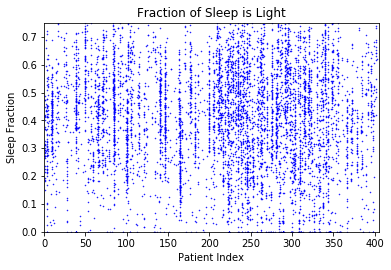

In [0]:
name = 'LightFraction'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Fraction of Sleep is Light')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Sleep Fraction')
ax.axis([0, 405, 0, 0.75])

plt.plot(df2['Patient Index'],df2['Light Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

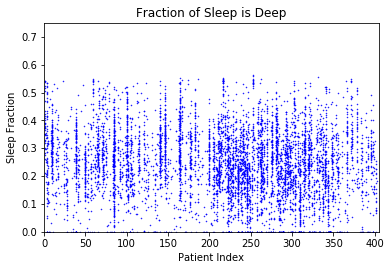

In [0]:
name = 'DeepFraction'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Fraction of Sleep is Deep')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Sleep Fraction')
ax.axis([0, 405, 0, 0.75])

plt.plot(df2['Patient Index'],df2['Deep Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

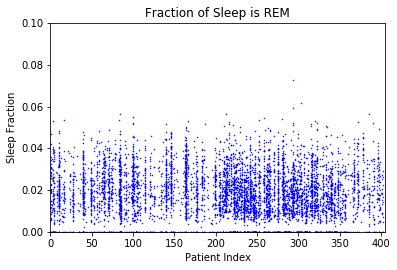

In [0]:
name = 'REMFraction'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Fraction of Sleep is REM')
ax.set_xlabel('Patient Index')
ax.set_ylabel('Sleep Fraction')
ax.axis([0, 405, 0, 0.1])

plt.plot(df2['Patient Index'],df2['REM Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

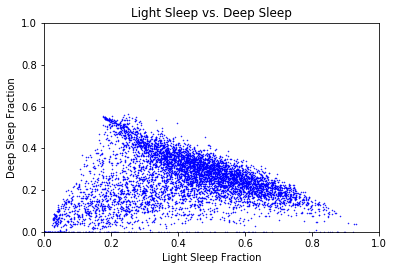

In [0]:
name = 'LightVsDeep'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Light Sleep vs. Deep Sleep')
ax.set_xlabel('Light Sleep Fraction')
ax.set_ylabel('Deep Sleep Fraction')
ax.axis([0, 1, 0, 1])

plt.plot(df2['Light Fraction'],df2['Deep Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

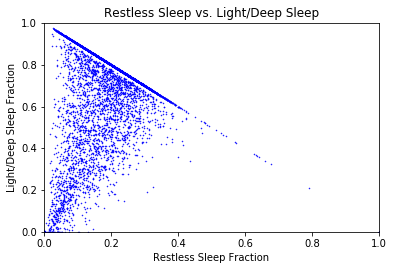

In [0]:
name = 'RestlessVsLightAndDeep'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Restless Sleep vs. Light/Deep Sleep')
ax.set_xlabel('Restless Sleep Fraction')
ax.set_ylabel('Light/Deep Sleep Fraction')
ax.axis([0, 1, 0, 1])

plt.plot(df2['Restless Fraction'],df2['Light Fraction']+df2['Deep Fraction'], 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

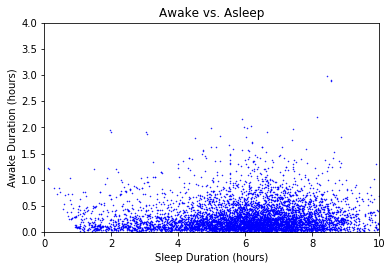

In [0]:
name = 'AwakeVsSleep'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Awake vs. Asleep')
ax.set_xlabel('Sleep Duration (hours)')
ax.set_ylabel('Awake Duration (hours)')
ax.axis([0, 10, 0, 4])

plt.plot(df2['Total Sleep']/3600,df2['Total Awake']/3600, 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

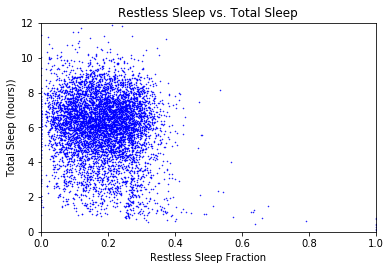

In [0]:
name = 'RestlessVsTotal'
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Restless Sleep vs. Total Sleep')
ax.set_xlabel('Restless Sleep Fraction')
ax.set_ylabel('Total Sleep (hours))')
ax.axis([0, 1, 0, 12])

plt.plot(df2['Restless Fraction'],df2['Total Sleep']/3600, 'b.', markersize=1)

fig.savefig('/content/drive/My Drive/SSS/%s.png' % name)

In [0]:
sleepIdx  = []
sleepLen  = []
indivIdx  = []
indivMean = []
indivStd  = []
patCnt    = 0
for cnt1 in range(6,len(sheetNames)-1):
  patCnt = patCnt+1
  indivSleep = []
  if cnt1<20:
    df = xl.parse(sheet_name=sheetNames[cnt1], skiprows=[0])
  else:
    df = xl.parse(sheet_name=sheetNames[cnt1])
  uniIdx = df.proSleepID.unique()
  for cnt in range(0, len(uniIdx)):
    uniDF = df.loc[df['proSleepID'] == uniIdx[cnt]]
    sleepHours = max(uniDF['proTime'])/3600
    sleepLen.append(sleepHours)
    sleepIdx.append(patCnt)
    indivSleep.append(sleepHours)
  indivMean.append(np.mean(indivSleep))
  indivStd.append(np.std(indivSleep))
  indivIdx.append(patCnt)

print(sleepIdx)
print(sleepLen)
print(indivIdx)
print(indivMean)
print(indivStd)

In [0]:
sleepIdx  = []
sleepLen  = []
indivIdx  = []
indivMean = []
indivStd  = []
patCnt    = 0
for cnt1 in range(6,len(sheetNames)-1):
  patCnt = patCnt+1
  indivSleep = []
  if cnt1<20:
    df = xl.parse(sheet_name=sheetNames[cnt1], skiprows=[0])
  else:
    df = xl.parse(sheet_name=sheetNames[cnt1])
  uniIdx = df.proSleepID.unique()
  for cnt in range(0, len(uniIdx)):
    uniDF = df.loc[df['proSleepID'] == uniIdx[cnt]]
    sleepHours = max(uniDF['proTime'])/3600
    sleepLen.append(sleepHours)
    sleepIdx.append(patCnt)
    indivSleep.append(sleepHours)
  indivMean.append(np.mean(indivSleep))
  indivStd.append(np.std(indivSleep))
  indivIdx.append(patCnt)

print(sleepIdx)
print(sleepLen)
print(indivIdx)
print(indivMean)
print(indivStd)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [0]:
for cnt1 in range(6,len(sheetNames)-1):
  if cnt1<20:
    df = xl.parse(sheet_name=sheetNames[cnt1], skiprows=[0])
  else:
    df = xl.parse(sheet_name=sheetNames[cnt1])
  uniIdx = df.proSleepID.unique()
  for cnt in range(0, len(uniIdx)):
    uniDF = df.loc[df['proSleepID'] == uniIdx[cnt]]
    sleepHours = max(uniDF['proTime'])/3600
    sleepLen.append(sleepHours)
    sleepIdx.append(patCnt)
    indivSleep.append(sleepHours)